In [8]:
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config20
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config8
from configs.RecursiveVPSDE.Markovian_12DLorenz.recursive_Markovian_PostMeanScore_12DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config12
from configs.RecursiveVPSDE.Markovian_40DLorenz.recursive_Markovian_PostMeanScore_40DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config40
import matplotlib.pyplot as plt
import numpy as np
from utils.resource_logger import wallclock_and_system_metrics

In [9]:
config8 = config8()
config8.nadaraya_resource_logging_path = config8.nadaraya_resource_logging_path.replace(".json.json","_GPUNADARAYA.json.json")
config12 = config12()
config12.nadaraya_resource_logging_path = config12.nadaraya_resource_logging_path.replace(".json.json","_GPUNADARAYA.json.json")
config20 = config20()
config20.nadaraya_resource_logging_path = config20.nadaraya_resource_logging_path.replace(".json.json","_GPUNADARAYA.json.json")
config40 = config40()
config40.nadaraya_resource_logging_path = config40.nadaraya_resource_logging_path.replace(".json.json","_GPUNADARAYA.json.json")
assert config8.feat_thresh == config12.feat_thresh == config20.feat_thresh == config40.feat_thresh == 1.

In [10]:
nad8, nad12, nad20, nad40 = wallclock_and_system_metrics(config8.nadaraya_resource_logging_path, inclusive=False), wallclock_and_system_metrics(config12.nadaraya_resource_logging_path, inclusive=False), wallclock_and_system_metrics(config20.nadaraya_resource_logging_path, inclusive=False), wallclock_and_system_metrics(config40.nadaraya_resource_logging_path, inclusive=False)


In [ ]:
score8, score12, score20, score40 = wallclock_and_system_metrics(config8.resource_logging_path, inclusive=False), wallclock_and_system_metrics(config12.resource_logging_path, inclusive=False), wallclock_and_system_metrics(config20.resource_logging_path, inclusive=False), wallclock_and_system_metrics(config40.resource_logging_path, inclusive=False)


In [11]:
score20, score40 = wallclock_and_system_metrics(config20.resource_logging_path, inclusive=False), wallclock_and_system_metrics(config40.resource_logging_path, inclusive=False)

In [12]:
dims = [20, 40]

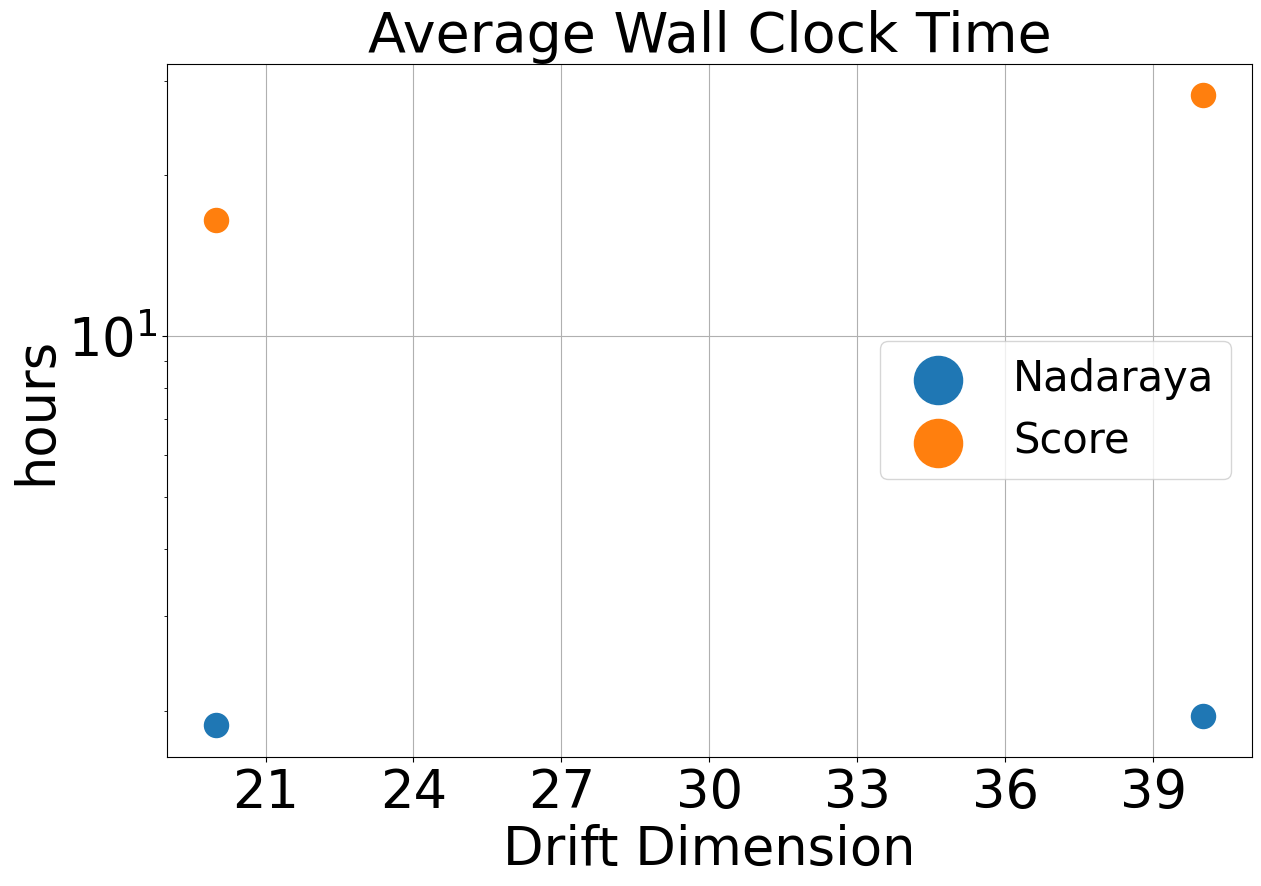

In [17]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(dims, 40*np.array([nad20["wall_clock_per_unit_h"], nad40["wall_clock_per_unit_h"]]),s=300, label="Nadaraya")
plt.scatter(dims, 3000*np.array([score20["wall_clock_per_unit_h"],score40["wall_clock_per_unit_h"]]), label="Score", s=300)
plt.title(rf"Average Wall Clock Time",fontsize=40)
plt.grid(True)
plt.yscale("log")
ax.tick_params(labelsize=38)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"hours", fontsize=38)
plt.xlabel("Drift Dimension", fontsize=38)
plt.legend(fontsize=30, markerscale=2)
plt.show()

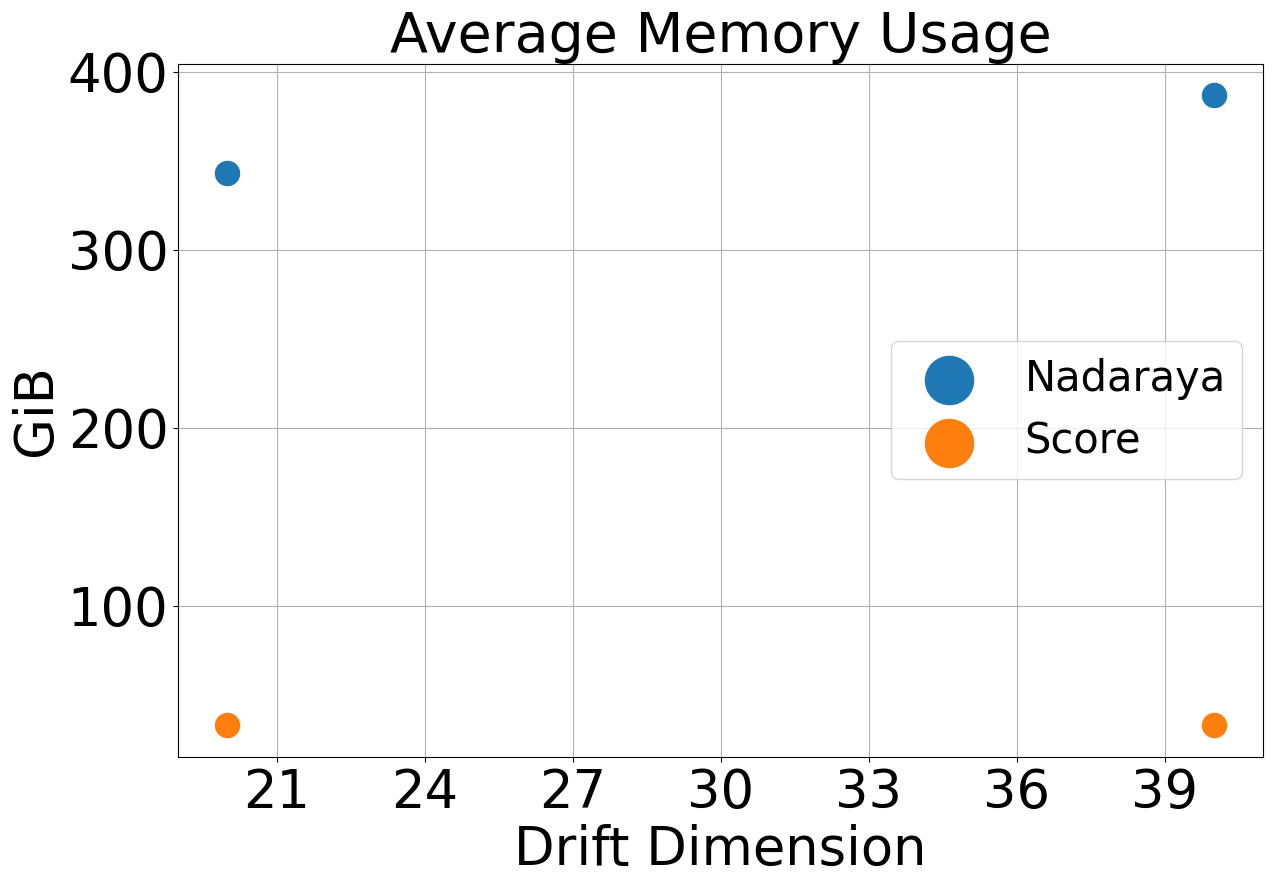

In [16]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(dims, [nad20["gpu_mem_avg_gib"]+nad20["ram_avg_gib"], nad40["gpu_mem_avg_gib"]+nad40["ram_avg_gib"]],s=300, label="Nadaraya")
plt.scatter(dims, [score20["gpu_mem_avg_gib"]+score20["ram_avg_gib"], score40["gpu_mem_avg_gib"]+score40["ram_avg_gib"]], label="Score", s=300)
plt.title(rf"Average Memory Usage",fontsize=40)
plt.grid(True)
ax.tick_params(labelsize=38)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"GiB", fontsize=38)
plt.xlabel("Drift Dimension", fontsize=38)
plt.legend(fontsize=30, markerscale=2)
plt.show()

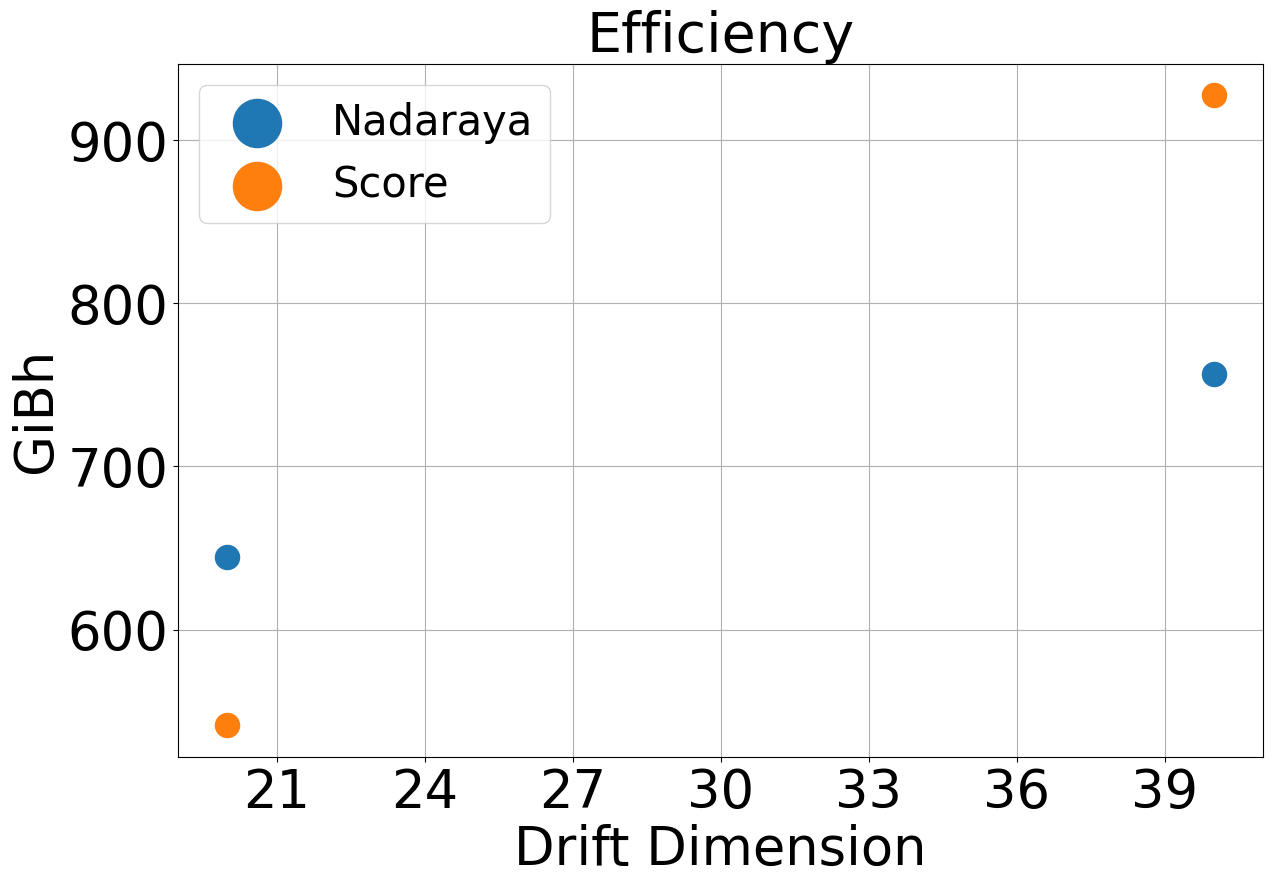

In [21]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(dims, 40*np.array([nad20["wall_clock_per_unit_h"], nad40["wall_clock_per_unit_h"]])*np.array([nad20["gpu_mem_avg_gib"]+nad20["ram_avg_gib"], nad40["gpu_mem_avg_gib"]+nad40["ram_avg_gib"]]),s=300, label="Nadaraya")
plt.scatter(dims, 3000*np.array([score20["wall_clock_per_unit_h"],score40["wall_clock_per_unit_h"]])*np.array([score20["gpu_mem_avg_gib"]+score20["ram_avg_gib"], score40["gpu_mem_avg_gib"]+score40["ram_avg_gib"]]), label="Score", s=300)
plt.title(rf"Efficiency",fontsize=40)
plt.grid(True)
ax.tick_params(labelsize=38)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"GiBh", fontsize=38)
plt.xlabel("Drift Dimension", fontsize=38)
plt.legend(fontsize=30, markerscale=2)
plt.show()